# Real World Data Wrangling Project
### Mortgage Foreclosure & Tax Lien Analysis | Allegheny County, PA

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Gather data

In this section, I will extract data using two different data gathering methods and combine the data. Two different types of data-gathering methods will be utilized.

### **1.1.** Problem Statement
For this project, I aim to analyze the financial distress in municipalities within Allegheny County by investigating mortgage foreclosure and tax lien data. Specifically, I will address two key research questions: identifying the top 5 municipalities with the highest total mortgage foreclosure amounts and the top 5 municipalities with the highest total tax lien amounts. The datasets utilized will include the Allegheny County Mortgage Foreclosure Records and the Allegheny County Tax Liens data.

### **1.2.** Gather at least two datasets using two different data gathering methods



#### **Dataset 1**

**Type**: CSV File

**Method**: Download data manually | The chosen method of downloading the data manually ensures that the data is accurate and properly vetted before analysis.

**Dataset variables**:

* **_id**: An identifier for each record in the dataset.
* **pin**: The Property Identification Number, a unique code assigned to each property.
* **block_lot**: The block and lot number, which further identifies the specific property within a block.
* **filing_date**: The date on which the foreclosure case was filed.
* **case_id**: The identification number assigned to the foreclosure case.
* **municipality**: The name of the municipality where the property is located.
* **ward**: The ward within the municipality
* **docket_type**: The type of legal docket or action related to the foreclosure case.
* **amount**: The total amount of money involved in the foreclosure
* **plaintiff**: The entity (usually a bank or financial institution) that filed the foreclosure case.
* **last_activity**: The date or description of the most recent activity in the foreclosure case

**Why this dataset**: I picked the Allegheny County Mortgage Foreclosure Records dataset because it provides comprehensive information on properties undergoing foreclosure within the county, which is essential for analyzing financial distress in different municipalities. The dataset includes key variables such as pin, case_id, municipality, and amount, which allow for the identification of municipalities with the highest foreclosure amounts and the financial entities involved.

In [2]:
# Loading the first dataset from a local CSV file
mf_data = pd.read_csv('Allegheny_County_Mortgage_Foreclosure_Records.csv')
mf_data.head()

,_id,pin,block_lot,filing_date,case_id,municipality,ward,docket_type,amount,plaintiff,last_activity
0,1,1222S00215000000,1222S215,2009-01-02,GD-09-000087,Tarentum Boro,NaN,Sheriff Return,61821.09,Beneficial Consumer Discount Company,NaN
1,2,1127N00019000000,1127N19,2009-01-02,GD-09-000093,Elizabeth Township,NaN,Praecipe to Substitute,24531.41,National City Real Estate Services LLC,NaN
2,3,0690C00043000000,690C43,2009-01-02,GD-09-000110,N. Fayette Township,NaN,Sheriff Return,21787.83,JPMorgan Chase Bank National Association,NaN
3,4,1414S00194000000,1414S194,2009-01-02,GD-09-000111,Elizabeth Township,NaN,Certificate-Recorder of Deeds,63072.46,JPMorgan Chase Bank National Association,NaN
4,5,0131D00016000000,131D16,2009-01-02,GD-09-000112,Homestead Boro,NaN,Default Judgment,63693.10,Deutsche Bank National Trust Company,NaN


#### Dataset 2

**Type**: CSV File

**Method**: Programmatically downloading files | The method of programmatically downloading the dataset ensures timely and efficient access to accurate and up-to-date information, facilitating robust analysis.

**Dataset variables**:

* **_id**: An identifier for each record in the dataset.
* **pin**: The Property Identification Number, a unique code assigned to each property.
* **number**: The number of tax liens associated with the property.
* **total_amount**: The total amount of money owed in tax liens for the property.

**Why this dataset**: I picked the Allegheny County Tax Lien dataset because it provides detailed information on properties with outstanding tax liens, which is critical for assessing financial distress in various municipalities within the county. The dataset includes significant variables such as pin, and total_amount, which help identify properties with the highest tax lien amounts and the extent of financial liabilities. 

In [3]:
# Loading the second dataset from a URL
url = 'https://data.wprdc.org/datastore/dump/d1e80180-5b2e-4dab-8ec3-be621628649e'
response = requests.get(url)
response

<Response [200]>

In [4]:
# Save the file
with open('Allegheny_County_Tax_Liens', mode = 'wb') as file:
    file.write(response.content)
    
# Read CSV file
tl_data = pd.read_csv('Allegheny_County_Tax_Liens')
tl_data.head()

,_id,pin,number,total_amount
0,1953139,0001B00010000000,11,13585.47
1,1953140,0001C00058000000,2,7827.64
2,1953141,0001C016610W2100,1,805.33
3,1953142,0001C01661W13700,3,3654.30
4,1953143,0001C01661W21800,1,121.13


In [5]:
# Optional: Save the raw dataset files to a local data store
mf_data.to_csv('Allegheny_County_Mortgage_Foreclosure_Records_Raw.csv', index=False)
tl_data.to_csv('Allegheny_County_Tax_Liens_Raw.csv', index=False)

# Verify saving by reading back the stored files
raw_mf_data = pd.read_csv('Allegheny_County_Mortgage_Foreclosure_Records_Raw.csv')
raw_tl_data = pd.read_csv('Allegheny_County_Tax_Liens_Raw.csv')

# Display the first few rows of the stored data to ensure they are saved correctly
raw_tl_data.head()

,_id,pin,number,total_amount
0,1953139,0001B00010000000,11,13585.47
1,1953140,0001C00058000000,2,7827.64
2,1953141,0001C016610W2100,1,805.33
3,1953142,0001C01661W13700,3,3654.30
4,1953143,0001C01661W21800,1,121.13


In [6]:
# Display the first few rows of the stored data to ensure they are saved correctly
raw_mf_data.head()

,_id,pin,block_lot,filing_date,case_id,municipality,ward,docket_type,amount,plaintiff,last_activity
0,1,1222S00215000000,1222S215,2009-01-02,GD-09-000087,Tarentum Boro,NaN,Sheriff Return,61821.09,Beneficial Consumer Discount Company,NaN
1,2,1127N00019000000,1127N19,2009-01-02,GD-09-000093,Elizabeth Township,NaN,Praecipe to Substitute,24531.41,National City Real Estate Services LLC,NaN
2,3,0690C00043000000,690C43,2009-01-02,GD-09-000110,N. Fayette Township,NaN,Sheriff Return,21787.83,JPMorgan Chase Bank National Association,NaN
3,4,1414S00194000000,1414S194,2009-01-02,GD-09-000111,Elizabeth Township,NaN,Certificate-Recorder of Deeds,63072.46,JPMorgan Chase Bank National Association,NaN
4,5,0131D00016000000,131D16,2009-01-02,GD-09-000112,Homestead Boro,NaN,Default Judgment,63693.10,Deutsche Bank National Trust Company,NaN


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

### Quality Issue 1 - Mortgage Foreclosure Data

The dataset has missing values, zero values in the 'amount' column, and duplicated records

In [7]:
#Inspecting the dataframe visually
mf_data.sample(5, random_state=11)

,_id,pin,block_lot,filing_date,case_id,municipality,ward,docket_type,amount,plaintiff,last_activity
14017,14018,0746K00005000000,746K5,2012-12-17,MG-12-002037,Pitcairn Boro,NaN,Settled and Discontinued,9030.74,Midfirst Bank,NaN
30040,30041,0061E00182000000,0061E00182 000000,2020-01-16,GD-20-000871,Pittsburgh,19.0,Settled and Discontinued,0.00,PNC Bank National Association,NaN
19599,19600,0667R00073000000,667R73,2015-01-16,GD-15-000829,Bethel Park Boro,NaN,Settled and Discontinued,71830.93,Northwest Savings Bank,NaN
31671,31672,0096C00092000000,96C92,2022-06-22,MG-22-000466,Pittsburgh,32.0,Confidential Information Form,71174.93,Midfirst Bank,NaN
26899,26900,0235N00078000000,235N78,2018-04-17,GD-18-005026,Braddock Boro,NaN,Complaint,17500.55,Bank of New York Mellon,NaN


In [8]:
# Inspecting the dataframe programmatically
mf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37020 entries, 0 to 37019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            37020 non-null  int64  
 1   pin            36775 non-null  object 
 2   block_lot      36971 non-null  object 
 3   filing_date    37020 non-null  object 
 4   case_id        37020 non-null  object 
 5   municipality   37020 non-null  object 
 6   ward           9920 non-null   float64
 7   docket_type    31859 non-null  object 
 8   amount         36374 non-null  float64
 9   plaintiff      37020 non-null  object 
 10  last_activity  5161 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.1+ MB


In [9]:
# Count the number of rows where the 'amount' column has a value of 0
zero_amount = (mf_data['amount'] == 0).sum().item()
zero_amount

5011

In [10]:
# Calculate the number of duplicate records based on 'pin' and 'amount' columns
mf_duplicated_columns = ['pin', 'amount']
mf_data.duplicated(subset=mf_duplicated_columns).sum().item()

3283

* **Inspecting the dataframe visually** <br>
1. Column 'ward' and 'last_activity' have missing values.
2. Column 'amount' has value = 0. This is the record for outstanding loan amount for foreclosure property. Thus, the value should be great than 0

* **Inspecting the dataframe programmatically** <br>
1. Column 'pin', 'block_lot', 'ward', 'docket_type', 'amount' and 'last_activity' have missing values 
<br> 
2. There are 5,011 property records with a value of 0 in the 'amount' column, which represents the outstanding loan amount for foreclosure properties. This value should be greater than 0.<br> 
3. There are 3,283 property records that have duplicated PIN numbers and outstanding loan amounts. This means some properties with mortage forlcosure have been recorded more than once.<br> 

### Quality Issue 2 - Tax Lien Data

The 'total_amount' column contains 10 rows with a value of 0, which is a typo since tax lien amounts should exceed 0.

In [11]:
# Inspecting the dataframe visually
tl_data.sample(10, random_state=83)

,_id,pin,number,total_amount
74384,2027523,8000T00167000000,26,1735.40
10304,1963443,0046B00114000000,25,16448.63
41241,1994380,0301J00151000000,54,7632.34
69152,2022291,1080S00084000000,1,0.00
11108,1964247,0047C00244000000,20,3575.37
6837,1959976,0026N00045000000,8,2107.77
65197,2018336,0815N00086000000,45,13745.22
22561,1975700,0125F00340000000,15,2046.30
53871,2007010,0455F00091000000,110,1859.81
43581,1996720,0307P00051000000,7,2575.57


In [12]:
# Inspecting the dataframe programmatically
tl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78755 entries, 0 to 78754
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           78755 non-null  int64  
 1   pin           78755 non-null  object 
 2   number        78755 non-null  int64  
 3   total_amount  78755 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.4+ MB


In [13]:
# Counting the number of rows with total_amount equal to 0
total_amount_zero = (tl_data['total_amount'] == 0).sum().item()
total_amount_zero

10

In [14]:
# Calculate the number of duplicate records based on 'pin' and 'total_amount' columns
tl_duplicated_columns = ['pin', 'total_amount']
tl_data.duplicated(subset=tl_duplicated_columns).sum().item()

0

* **Inspecting the dataframe visually** <br><br>
There is a value of 0 in the 'total_amount' column. This is a typo because the tax lien amount should be greater than 0 <br><br>

* **Inspecting the dataframe programmatically** <br><br>
Although there are no duplicate values based on the 'pin' and 'total_amount' columns, there are 10 rows with a total_amount equal to 0. This is a typo because the tax lien amount should be greater than 0. <br> 

### Tidiness Issue 1 - Mortgage Foreclosure Data

The 'filing_date' column has the wrong data type. To facilitate data analysis, it needs to be converted to datetime during the cleaning stage.

In [15]:
# Inspecting the dataframe visually
mf_data.sample(5, random_state=11)

,_id,pin,block_lot,filing_date,case_id,municipality,ward,docket_type,amount,plaintiff,last_activity
14017,14018,0746K00005000000,746K5,2012-12-17,MG-12-002037,Pitcairn Boro,NaN,Settled and Discontinued,9030.74,Midfirst Bank,NaN
30040,30041,0061E00182000000,0061E00182 000000,2020-01-16,GD-20-000871,Pittsburgh,19.0,Settled and Discontinued,0.00,PNC Bank National Association,NaN
19599,19600,0667R00073000000,667R73,2015-01-16,GD-15-000829,Bethel Park Boro,NaN,Settled and Discontinued,71830.93,Northwest Savings Bank,NaN
31671,31672,0096C00092000000,96C92,2022-06-22,MG-22-000466,Pittsburgh,32.0,Confidential Information Form,71174.93,Midfirst Bank,NaN
26899,26900,0235N00078000000,235N78,2018-04-17,GD-18-005026,Braddock Boro,NaN,Complaint,17500.55,Bank of New York Mellon,NaN


In [16]:
# Inspecting the dataframe programmatically
mf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37020 entries, 0 to 37019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            37020 non-null  int64  
 1   pin            36775 non-null  object 
 2   block_lot      36971 non-null  object 
 3   filing_date    37020 non-null  object 
 4   case_id        37020 non-null  object 
 5   municipality   37020 non-null  object 
 6   ward           9920 non-null   float64
 7   docket_type    31859 non-null  object 
 8   amount         36374 non-null  float64
 9   plaintiff      37020 non-null  object 
 10  last_activity  5161 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.1+ MB


**Inspecting the dataframe visually** <br><br>
The 'filing_date' column is formatted as year-month-date. Although it appears correct, it is likely that the data type is set to string instead of datetime. Therefore, we need to inspect the dataframe programmatically to verify and correct the data type of 'filing_date'. <br><br>

**Inspecting the dataframe programmatically** <br><br>
From the code above, we can clearly see that the 'filing_date' column is categorized as an object rather than a datetime. This needs to be revised in the data cleaning stage. <br> 

### Tidiness Issue 2 - Mortgage Foreclosure Data

The 'case_id' column contains two variables, 'foreclosure_type' and 'case_id', which violates data tidiness guidelines.

In [17]:
# Inspecting the dataframe visually
mf_data.sample(5, random_state=11)

,_id,pin,block_lot,filing_date,case_id,municipality,ward,docket_type,amount,plaintiff,last_activity
14017,14018,0746K00005000000,746K5,2012-12-17,MG-12-002037,Pitcairn Boro,NaN,Settled and Discontinued,9030.74,Midfirst Bank,NaN
30040,30041,0061E00182000000,0061E00182 000000,2020-01-16,GD-20-000871,Pittsburgh,19.0,Settled and Discontinued,0.00,PNC Bank National Association,NaN
19599,19600,0667R00073000000,667R73,2015-01-16,GD-15-000829,Bethel Park Boro,NaN,Settled and Discontinued,71830.93,Northwest Savings Bank,NaN
31671,31672,0096C00092000000,96C92,2022-06-22,MG-22-000466,Pittsburgh,32.0,Confidential Information Form,71174.93,Midfirst Bank,NaN
26899,26900,0235N00078000000,235N78,2018-04-17,GD-18-005026,Braddock Boro,NaN,Complaint,17500.55,Bank of New York Mellon,NaN


In [18]:
# Inspecting the dataframe programmatically
mf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37020 entries, 0 to 37019
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id            37020 non-null  int64  
 1   pin            36775 non-null  object 
 2   block_lot      36971 non-null  object 
 3   filing_date    37020 non-null  object 
 4   case_id        37020 non-null  object 
 5   municipality   37020 non-null  object 
 6   ward           9920 non-null   float64
 7   docket_type    31859 non-null  object 
 8   amount         36374 non-null  float64
 9   plaintiff      37020 non-null  object 
 10  last_activity  5161 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 3.1+ MB


In [19]:
# Inspecting the dataframe programmatically

# Counting case_ids that start with 'MG'
mg_count = mf_data[mf_data['case_id'].str.startswith('MG')]['case_id'].count()

# Counting case_ids that start with 'GD'
gd_count = mf_data[mf_data['case_id'].str.startswith('GD')]['case_id'].count()

print(f"Count of case_ids starting with 'MG': {mg_count}")
print(f"Count of case_ids starting with 'GD': {gd_count}")

Count of case_ids starting with 'MG': 27453
Count of case_ids starting with 'GD': 9567


**Foreclosure Type Classification**:
1. MG (Mortgage General): Narrow focus on mortgage-related foreclosures.<br>
2. GD (General Docket): Broad scope, encompassing many types of civil disputes.<br><br>


**Inspecting the dataframe visually** <br><br>
From the column 'case_id', we can see that some cells start with 'MG' while others start with 'GD'. This violates the data tidiness guideline that states "Each variable forms a column." Since there are two variables present, we need to split the column 'case_id' into two separate columns. One column should be named 'foreclosure_type' and the other should be named 'case_id'. <br><br>

**Inspecting the dataframe programmatically** <br><br>
From the data above, we can clearly see that there are 27,453 rows where the 'case_id' starts with "MG" and 9,567 rows where the 'case_id' starts with "GD". This results in a total of 37,020 rows in the table, which is the sum of 27,453 and 9,567. This indicates that there are no 'case_id' entries that start with anything other than "MG" or "GD". So, we can go ahead and split column 'case_id' into two separate columns. <br> 

## 3. Clean data




<bar>
    
    




In [20]:
# Make copies of the datasets to ensure the raw dataframes are not impacted
mf_data_copy = mf_data.copy()
tl_data_copy = tl_data.copy()

### Quality Issue 1 - Mortgage Foreclosure Data

The dataset has missing values, zero values in the 'amount' column, and duplicated records

In [21]:
# Drop the 'ward' and 'last_activity' columns from mf_data_copy
mf_data_copy = mf_data_copy.drop(['ward', 'last_activity'], axis=1)

In [22]:
# Replacing Zero Values with NaN in 'amount' Column
mf_data_copy['amount'] = mf_data_copy['amount'].replace({0: np.nan})

In [23]:
# Dropping rows with missing values
clean_mf_data_copy = mf_data_copy.dropna()

In [24]:
# Removes all duplicate rows based on the 'pin' and 'amount' columns
clean_mf_data_copy = clean_mf_data_copy.drop_duplicates(subset=['pin', 'amount'])

In [25]:
# Check the data and see if 
# 'ward' and 'last_activity' columns are dropped
# All rows with missing values are dropped
clean_mf_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27204 entries, 0 to 31858
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           27204 non-null  int64  
 1   pin           27204 non-null  object 
 2   block_lot     27204 non-null  object 
 3   filing_date   27204 non-null  object 
 4   case_id       27204 non-null  object 
 5   municipality  27204 non-null  object 
 6   docket_type   27204 non-null  object 
 7   amount        27204 non-null  float64
 8   plaintiff     27204 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.1+ MB


In [26]:
# Check if there are any zero values in 'amount' column
current_zero_count_v2 = (mf_data_copy['amount'] == 0).sum().item()
current_zero_count_v2

0

In [27]:
# Check if all duplicate rows based on the 'pin' and 'amount' columns are removed
mf_duplicated_columns_v2 = ['pin', 'amount']
clean_mf_data_copy.duplicated(subset=mf_duplicated_columns_v2).sum().item()

0

**The code above successfully performs the following operations:**
<bar>
1. Drops the columns 'ward' and 'last_activity', which contain a significant amount of missing values.
2. Converts all zero values in the 'amount' column to NaN.
3. Removes all rows with missing values.
4. Removes duplicate rows based on the 'pin' and 'amount' columns, ensuring that each property record is unique and not recorded more than once.

### Quality Issue 2 - Tax Lien Data

The 'total_amount' column contains 10 rows with a value of 0, which is a typo since tax lien amounts should exceed 0.

In [28]:
# Replacing Zero Values with NaN in 'total_amount' Column
tl_data_copy['total_amount'] = tl_data_copy['total_amount'].replace({0: np.nan})

In [29]:
# Remove all missing values
clean_tl_data_copy = tl_data_copy.dropna()

In [30]:
# Make sure there is no missing value left in the dataset
clean_tl_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78745 entries, 0 to 78754
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           78745 non-null  int64  
 1   pin           78745 non-null  object 
 2   number        78745 non-null  int64  
 3   total_amount  78745 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


In [31]:
# Check if there are any zero values in 'total_amount' column
total_amount_zero_v2 = (clean_tl_data_copy['total_amount'] == 0).sum().item()
total_amount_zero_v2

0

**The code above successfully performs the following operations:**
<bar>

* Converted zero values in the ‘total_amount’ column to NaN and removed rows with missing data.

### Tidiness Issue 1 - Mortgage Foreclosure Data

The 'filing_date' column has the wrong data type. To facilitate data analysis, it needs to be converted to datetime during the cleaning stage.

In [32]:
# Change the data type of 'filing_date' from string to datetime
clean_mf_data_copy.filing_date = pd.to_datetime(clean_mf_data_copy.filing_date)

In [33]:
#Check if the data type of 'filing_date' 
clean_mf_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27204 entries, 0 to 31858
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   _id           27204 non-null  int64         
 1   pin           27204 non-null  object        
 2   block_lot     27204 non-null  object        
 3   filing_date   27204 non-null  datetime64[ns]
 4   case_id       27204 non-null  object        
 5   municipality  27204 non-null  object        
 6   docket_type   27204 non-null  object        
 7   amount        27204 non-null  float64       
 8   plaintiff     27204 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 2.1+ MB


**The code above successfully performs the following operations:**
<bar>

* The data type of ‘filing_date’ was originally categorized as a string in the dataset. To facilitate better data analysis, we converted the ‘filing_date’ data type to datetime.

### Tidiness Issue 2 - Mortgage Foreclosure Data

The 'case_id' column contains two variables, 'foreclosure_type' and 'case_id', which violates data tidiness guidelines.

In [34]:
# Split the column 'case_id' into 'foreclosure_type' and 'case_id' columns
clean_mf_data_copy[['foreclosure_type', 'case_id']] = clean_mf_data_copy['case_id'].str.split('-', n=1, expand=True)

In [35]:
# Check if the split was done successfully
clean_mf_data_copy.head()

,_id,pin,block_lot,filing_date,case_id,municipality,docket_type,amount,plaintiff,foreclosure_type
0,1,1222S00215000000,1222S215,2009-01-02,09-000087,Tarentum Boro,Sheriff Return,61821.09,Beneficial Consumer Discount Company,GD
1,2,1127N00019000000,1127N19,2009-01-02,09-000093,Elizabeth Township,Praecipe to Substitute,24531.41,National City Real Estate Services LLC,GD
2,3,0690C00043000000,690C43,2009-01-02,09-000110,N. Fayette Township,Sheriff Return,21787.83,JPMorgan Chase Bank National Association,GD
3,4,1414S00194000000,1414S194,2009-01-02,09-000111,Elizabeth Township,Certificate-Recorder of Deeds,63072.46,JPMorgan Chase Bank National Association,GD
4,5,0131D00016000000,131D16,2009-01-02,09-000112,Homestead Boro,Default Judgment,63693.10,Deutsche Bank National Trust Company,GD


**Foreclosure Type Classification**:
1. MG (Mortgage General): Narrow focus on mortgage-related foreclosures.<br>
2. GD (General Docket): Broad scope, encompassing many types of civil disputes.<br><br>

**The code above successfully performs the following operations:**
<bar>

* To achieve data tidiness and facilitate future data analysis, we splited the 'case_id' column into two separate columns: 'foreclosure_type' and 'case_id'.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [36]:
# Inspect the data and determine unnecessary variables
clean_mf_data_copy.head()

,_id,pin,block_lot,filing_date,case_id,municipality,docket_type,amount,plaintiff,foreclosure_type
0,1,1222S00215000000,1222S215,2009-01-02,09-000087,Tarentum Boro,Sheriff Return,61821.09,Beneficial Consumer Discount Company,GD
1,2,1127N00019000000,1127N19,2009-01-02,09-000093,Elizabeth Township,Praecipe to Substitute,24531.41,National City Real Estate Services LLC,GD
2,3,0690C00043000000,690C43,2009-01-02,09-000110,N. Fayette Township,Sheriff Return,21787.83,JPMorgan Chase Bank National Association,GD
3,4,1414S00194000000,1414S194,2009-01-02,09-000111,Elizabeth Township,Certificate-Recorder of Deeds,63072.46,JPMorgan Chase Bank National Association,GD
4,5,0131D00016000000,131D16,2009-01-02,09-000112,Homestead Boro,Default Judgment,63693.10,Deutsche Bank National Trust Company,GD


In [37]:
# Change the name of the column 'amount' to 'mortgage_foreclosure_amount' to facilitate future data analysis
clean_mf_data_copy = clean_mf_data_copy.rename(columns = {'amount':'mortgage_foreclosure_amount'})
clean_mf_data_copy.head()

,_id,pin,block_lot,filing_date,case_id,municipality,docket_type,mortgage_foreclosure_amount,plaintiff,foreclosure_type
0,1,1222S00215000000,1222S215,2009-01-02,09-000087,Tarentum Boro,Sheriff Return,61821.09,Beneficial Consumer Discount Company,GD
1,2,1127N00019000000,1127N19,2009-01-02,09-000093,Elizabeth Township,Praecipe to Substitute,24531.41,National City Real Estate Services LLC,GD
2,3,0690C00043000000,690C43,2009-01-02,09-000110,N. Fayette Township,Sheriff Return,21787.83,JPMorgan Chase Bank National Association,GD
3,4,1414S00194000000,1414S194,2009-01-02,09-000111,Elizabeth Township,Certificate-Recorder of Deeds,63072.46,JPMorgan Chase Bank National Association,GD
4,5,0131D00016000000,131D16,2009-01-02,09-000112,Homestead Boro,Default Judgment,63693.10,Deutsche Bank National Trust Company,GD


In [38]:
# Drop unnecessary variables - '_id', and 'block_lot'
clean_mf_data_copy = clean_mf_data_copy.drop(['_id', 'block_lot'], axis=1)
clean_mf_data_copy.head()

,pin,filing_date,case_id,municipality,docket_type,mortgage_foreclosure_amount,plaintiff,foreclosure_type
0,1222S00215000000,2009-01-02,09-000087,Tarentum Boro,Sheriff Return,61821.09,Beneficial Consumer Discount Company,GD
1,1127N00019000000,2009-01-02,09-000093,Elizabeth Township,Praecipe to Substitute,24531.41,National City Real Estate Services LLC,GD
2,0690C00043000000,2009-01-02,09-000110,N. Fayette Township,Sheriff Return,21787.83,JPMorgan Chase Bank National Association,GD
3,1414S00194000000,2009-01-02,09-000111,Elizabeth Township,Certificate-Recorder of Deeds,63072.46,JPMorgan Chase Bank National Association,GD
4,0131D00016000000,2009-01-02,09-000112,Homestead Boro,Default Judgment,63693.10,Deutsche Bank National Trust Company,GD


In [39]:
# Inspect the data and determine unnecessary variables
clean_tl_data_copy.head()

,_id,pin,number,total_amount
0,1953139,0001B00010000000,11,13585.47
1,1953140,0001C00058000000,2,7827.64
2,1953141,0001C016610W2100,1,805.33
3,1953142,0001C01661W13700,3,3654.30
4,1953143,0001C01661W21800,1,121.13


In [40]:
# Change the name of the column 'total_amount' to 'tax_lien_amount' to facilitate future data analysis
clean_tl_data_copy = clean_tl_data_copy.rename(columns = {'total_amount':'tax_lien_amount'})
clean_tl_data_copy.head()

,_id,pin,number,tax_lien_amount
0,1953139,0001B00010000000,11,13585.47
1,1953140,0001C00058000000,2,7827.64
2,1953141,0001C016610W2100,1,805.33
3,1953142,0001C01661W13700,3,3654.30
4,1953143,0001C01661W21800,1,121.13


In [41]:
# Drop the unnecessary variables - '_id', and 'number'
clean_tl_data_copy = clean_tl_data_copy.drop(['_id', 'number'], axis=1)
clean_tl_data_copy.head()

,pin,tax_lien_amount
0,0001B00010000000,13585.47
1,0001C00058000000,7827.64
2,0001C016610W2100,805.33
3,0001C01661W13700,3654.30
4,0001C01661W21800,121.13


In [42]:
# Merge the two datasets on the 'pin' column using an inner join
merge_clean = pd.merge(clean_tl_data_copy, clean_mf_data_copy, on=['pin'], how='inner')
merge_clean.head()

,pin,tax_lien_amount,filing_date,case_id,municipality,docket_type,mortgage_foreclosure_amount,plaintiff,foreclosure_type
0,0001C01662021600,5042.88,2015-06-18,15-010558,Pittsburgh,Sheriff Return,9580.00,Gateway Towers Condominium Association Inc.,GD
1,0001C01662021600,5042.88,2016-07-26,16-013827,Pittsburgh,Notice,10107.00,Gateway Towers Condominium Association Inc.,GD
2,0001D00066000000,22377.20,2010-05-21,10-010205,Pittsburgh,Sheriff Return,21492753.69,U.S. Bank National Association,GD
3,0001D00259C70900,4130.10,2017-02-08,17-002075,Pittsburgh,Settled and Discontinued,562329.07,Slovenian Savings and Loan Association of Cano...,GD
4,0001D00259C70900,4130.10,2017-05-11,17-000610,Pittsburgh,Order of Court,574965.87,Slovenian Savings and Loan Association of Cano...,MG


In [43]:
# Inspect the merged dataset after inner merge
merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3565 entries, 0 to 3564
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   pin                          3565 non-null   object        
 1   tax_lien_amount              3565 non-null   float64       
 2   filing_date                  3565 non-null   datetime64[ns]
 3   case_id                      3565 non-null   object        
 4   municipality                 3565 non-null   object        
 5   docket_type                  3565 non-null   object        
 6   mortgage_foreclosure_amount  3565 non-null   float64       
 7   plaintiff                    3565 non-null   object        
 8   foreclosure_type             3565 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 250.8+ KB


The code renames columns for clarity, drops unnecessary variables, and merges two datasets for streamlined analysis. Renaming 'amount' to 'mortgage_foreclosure_amount' and 'total_amount' to 'tax_lien_amount' enhances readability. Dropping '_id', 'block_lot', and 'number' removes redundant data. Finally, merging on 'pin' consolidates relevant information into a single dataset, facilitating efficient analysis.

## 4. Update the data store
Update the local database/data store with the cleaned data

In [44]:
# Save the merged dataset file to the local data store
merge_clean.to_csv('merge_MortgageForeclosure_TaxLien_Clean.csv', index=False, encoding="utf-8")

In [45]:
# Save the cleaned mortgage foreclosure dataset file to the local data store
clean_mf_data_copy.to_csv('Allegheny_County_Mortgage_Foreclosure_Records_Clean.csv', index=False, encoding="utf-8")

In [46]:
# Save the cleaned tax lien dataset file to the local data store
clean_tl_data_copy.to_csv('Allegheny_County_Tax_Liens_Clean.csv', index=False, encoding="utf-8")

## 5. Answer the research question


**Research question 1:** What are the top 5 municipalities with the highest total mortgage foreclosure amounts?

In [47]:
# Group the 'merge_clean' DataFrame by 'municipality', without sorting the groups, and aggregate
# the 'mortgage_foreclosure_amount' column by summing the amounts for each municipality
merge_clean_group_municipality = merge_clean.groupby('municipality', sort=False).agg({
    'mortgage_foreclosure_amount': 'sum'})

In [48]:
# Inspect merge_clean_group_municipality dataframe
merge_clean_group_municipality.head()

,mortgage_foreclosure_amount
municipality,
Pittsburgh,79294788.07
Bellevue Boro,1837787.98
Mt. Oliver Boro,2248929.79
Mt. Lebanon Township,3865882.19
McCandless Township,1547760.35


In [49]:
# Set pandas option to disable scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [50]:
# Sort the merged, cleaned, and grouped municipality DataFrame by 'mortgage_foreclosure_amount' in descending order
top_5_municipality_sort = merge_clean_group_municipality.sort_values(by='mortgage_foreclosure_amount', ascending=False)
# Drop all but the top 5 rows from the sorted DataFrame to keep only the top 5 municipalities by 'mortgage_foreclosure_amount'
top_5_municipality = top_5_municipality_sort.drop(top_5_municipality_sort.index[5:])
# Display the top 5 municipalities by 'mortgage_foreclosure_amount'
top_5_municipality

,mortgage_foreclosure_amount
municipality,
City of Clairton,137822174.28
Pittsburgh,79294788.07
Harrison Township,32831589.32
West Mifflin Boro,24699182.19
Monroeville Boro,17484546.52


In [51]:
# Reset the index of the DataFrame to convert the current index into a column and create a new sequential index
top_5_municipality = top_5_municipality.reset_index()
# Inspect the dataframe
top_5_municipality

,municipality,mortgage_foreclosure_amount
0,City of Clairton,137822174.28
1,Pittsburgh,79294788.07
2,Harrison Township,32831589.32
3,West Mifflin Boro,24699182.19
4,Monroeville Boro,17484546.52


In [52]:
# Convert the 'mortgage_foreclosure_amount' column to float type to ensure numerical operations can be performed accurately
top_5_municipality['mortgage_foreclosure_amount'] = top_5_municipality['mortgage_foreclosure_amount'].astype(float)
# Display information about the DataFrame including the data types of each column and non-null counts
top_5_municipality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   municipality                 5 non-null      object 
 1   mortgage_foreclosure_amount  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 208.0+ bytes


In [53]:
# Set up a function for plotting bar charts below
# Plot a bar chart for the top 5 entries in the DataFrame based on a specified value column.
def plot_top_5_total_mortgage_foreclosure(df, title_col, value_col, x_label, y_label, chart_title):
    plt.figure(figsize=(11, 6))
    plt.bar(df[title_col], df[value_col])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.xticks(rotation=45)
    plt.show()

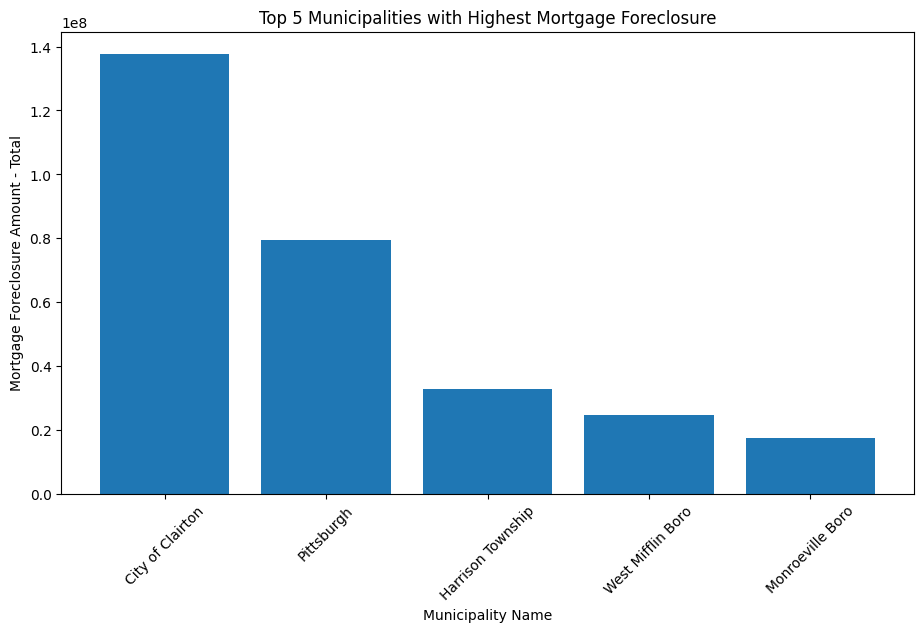

In [54]:
# Create a new figure for the plot with a specified size of 11 inches by 6 inches
plt.figure(figsize=(11, 6))

# Create a bar chart using the 'municipality' column for the x-axis and 'mortgage_foreclosure_amount' column for the y-axis
plt.bar(top_5_municipality['municipality'], top_5_municipality['mortgage_foreclosure_amount'])

# Set the label for the x-axis
plt.xlabel('Municipality Name')

# Set the label for the y-axis
plt.ylabel('Mortgage Foreclosure Amount - Total')

# Set the title of the bar chart
plt.title('Top 5 Municipalities with Highest Mortgage Foreclosure')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45);

**Answer to research question 1:** City of Clairton, Pittsburgh, Harrison Township, West Mifflin Boro, Monroeville Boro are top 5 municipalities with the highest mortgage foreclosure amounts.<bar><bar><bar>

The visualization helps answer the question by providing a clear, visual representation of the top 5 municipalities with the highest mortgage foreclosure amounts. By plotting the data in a bar chart, it becomes easier to compare the foreclosure amounts across different municipalities, identify patterns, and draw insights at a glance, thereby facilitating better data interpretation and decision-making.

<bar><bar><bar><bar><bar>**Research question 2:** What are the top 5 municipalities with the highest total tax lien amounts?

In [55]:
# Group the 'merge_clean' DataFrame by 'municipality', without sorting the groups, and aggregate
# the 'tax_lien_amount' column by summing the amounts for each municipality
merge_clean_group_municipality_v2 = merge_clean.groupby('municipality', sort=False).agg({
    'tax_lien_amount': 'sum'})

In [56]:
# Inspect merge_clean_group_municipality dataframe
merge_clean_group_municipality_v2.head()

,tax_lien_amount
municipality,
Pittsburgh,1785225.77
Bellevue Boro,35989.91
Mt. Oliver Boro,60385.59
Mt. Lebanon Township,106174.18
McCandless Township,31444.33


In [57]:
# Sort the merged, cleaned, and grouped municipality DataFrame by 'tax_lien_amount' in descending order
top_5_municipality_sort_v2 = merge_clean_group_municipality_v2.sort_values(by='tax_lien_amount', ascending=False)
# Drop all but the top 5 rows from the sorted DataFrame to keep only the top 5 municipalities by 'tax_lien_amount'
top_5_municipality_v2 = top_5_municipality_sort_v2.drop(top_5_municipality_sort_v2.index[5:])
# Display the top 5 municipalities by 'tax_lien_amount'
top_5_municipality_v2

,tax_lien_amount
municipality,
Pittsburgh,1785225.77
Monroeville Boro,657881.86
Penn Hills Township,486778.64
N. Versailles Twp.,447874.70
West Mifflin Boro,430554.11


In [58]:
# Reset the index of the DataFrame to convert the current index into a column and create a new sequential index
top_5_municipality_v2 = top_5_municipality_v2.reset_index()
# Inspect the dataframe
top_5_municipality_v2

,municipality,tax_lien_amount
0,Pittsburgh,1785225.77
1,Monroeville Boro,657881.86
2,Penn Hills Township,486778.64
3,N. Versailles Twp.,447874.70
4,West Mifflin Boro,430554.11


In [59]:
# Set up a function for plotting bar charts below
# Plot a bar chart for the top 5 entries in the DataFrame based on a specified value column.
def plot_top_5_total_tax_lien(df, title_col, value_col, x_label, y_label, chart_title):
    plt.figure(figsize=(11, 6))
    plt.bar(df[title_col], df[value_col])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.xticks(rotation=45)
    plt.show()

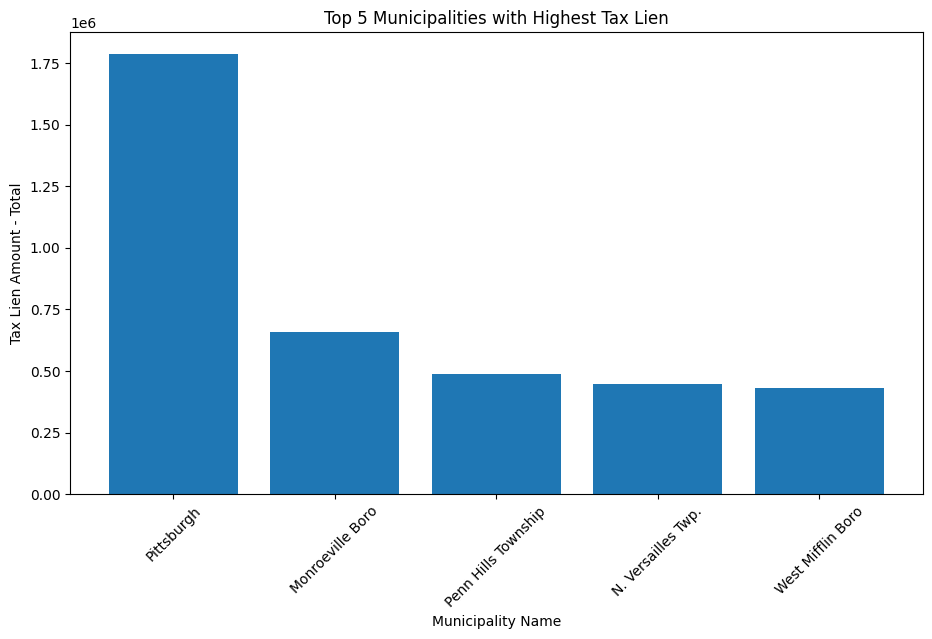

In [60]:
# Create a new figure for the plot with a specified size of 11 inches by 6 inches
plt.figure(figsize=(11, 6))

# Create a bar chart using the 'municipality' column for the x-axis and 'mortgage_foreclosure_amount' column for the y-axis
plt.bar(top_5_municipality_v2['municipality'], top_5_municipality_v2['tax_lien_amount'])

# Set the label for the x-axis
plt.xlabel('Municipality Name')

# Set the label for the y-axis
plt.ylabel('Tax Lien Amount - Total')

# Set the title of the bar chart
plt.title('Top 5 Municipalities with Highest Tax Lien')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45);

**Answer to research question 2:** Pittsburgh, Monroeville Boro, Penn Hills Township, N. Versailles Twp., and West Mifflin Boro are top 5 municipalities with the highest tax lien amounts.<bar><bar><bar>
    
Visualizing data with a bar chart helps in understanding the distribution of tax lien amounts among different municipalities. It allows for easy comparison of tax lien amounts, highlighting the top municipalities with the highest tax liens. This visual representation makes it easier to identify trends, patterns, and outliers, facilitating more informed decision-making and analysis.

### **5.2:** Reflection


I would conduct a time series analysis to examine trends and patterns in foreclosure rates over time. This would involve analyzing the dataset across different time periods to identify seasonal effects, cyclical trends, or long-term shifts in foreclosure activity. By leveraging time series models, I could forecast future foreclosure rates and assess the potential impact of economic and policy changes. 